# Properties of Digital Images

Just as anything else, digital images have some properties. These properties make the image as well can be manipulated to change the image to enhance it or to extract some information from them.

Some important properties of digital images are:

- **Image Resolution**
- **Image Brightness/Contrast**
- **Histogram**

Let's understand these properties and see how can we manipulate them using OpenCV as our tool.

## Image Resolution

**Resolution means the ability to distinguish two different and nearby/close entities. The smaller the distance (difference) between the two entities which we can seperate, the higher the resolution is.**

For images, resolution can be of 3 kinds:

- Spatial Resolution
- Spectral Resolution
- Temportal Resolution

### Spatial Resolution

Spatial resolution is probably the one, with which we have the most interaction in our day to day life. It refers to the ability to distinguish two close by objects in an image.

Spatial resolution is a consequence of the **size of the pixels** in the image. The smaller the size, the finner the details we can observe in an image. All of us have grown through the time when we used to have 2 MP cameras in our mobile phones and now there are cameras with even 100 MP available.

And it is trivial fact that the image quality from our phones has drastically improved since the start of last decade. This happens as a consequence of the ability to pack more and smaller pixels in the same size image, which improves the spatial resolution of the image.

Let's use some code to see how spatial resolution impacts our ability to see the image.

In [2]:
# Importing libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Reading a sample image

image = cv2.cvtColor(cv2.imread('..//assets//images//bombay-2.jpg'), cv2.COLOR_BGR2RGB)

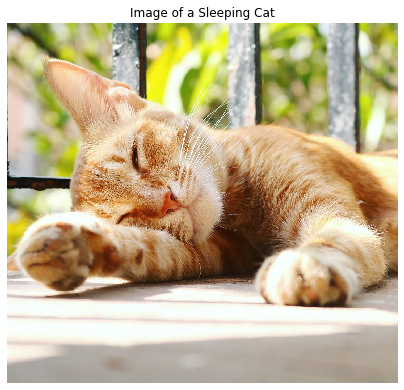

In [4]:
f, ax = plt.subplots(1, 1, figsize = (7, 7))
ax.imshow(image)
ax.set_title('Image of a Sleeping Cat')
ax.axis('off')
plt.show()

In [5]:
# Binning function

def binning(mat, fac):
    res = np.ones(mat.shape)
    for i in range(0, mat.shape[0], fac):
        for j in range(0, mat.shape[1], fac):
            res[i:i+fac, j:j+fac] = np.average(mat[i:i+fac, j:j+fac])
    
    return res

def spatial_binning(img, fac = 2):
    res = np.ones(img.shape)
    if(len(res.shape) == 2):
        res = binning(img, fac)
        res = res[:, :]/np.max(res[:, :])
    else:
        for c in range(3):
            res[:, :, c] = binning(img[:, :, c], fac)
            res[:, :, c] = res[:, :, c]/np.max(res[:, :, c])
            
    return res

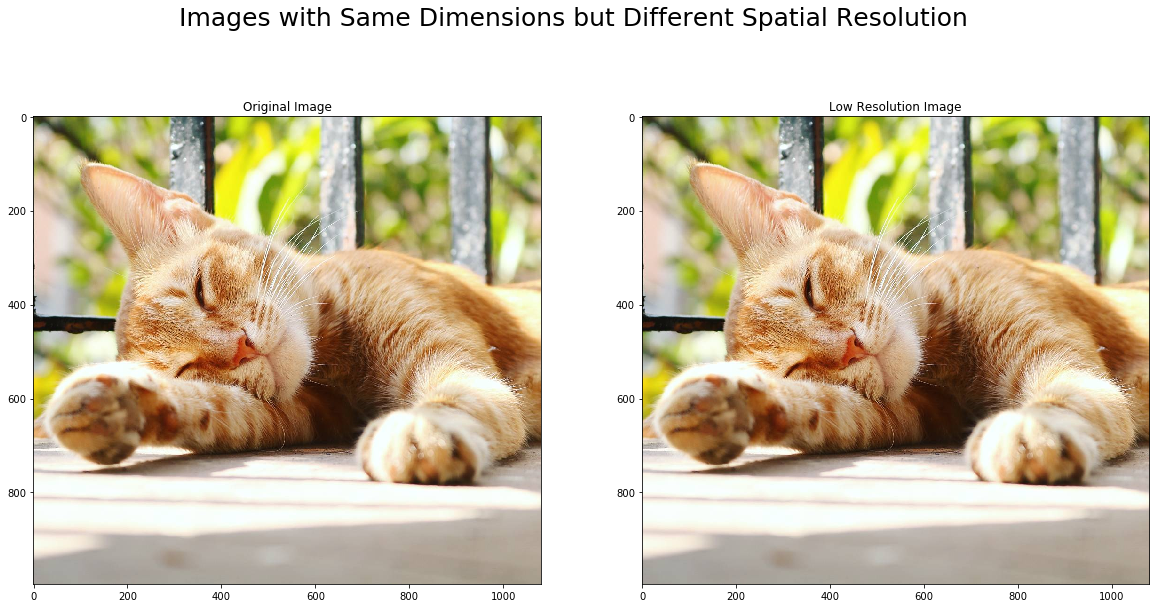

interactive(children=(IntSlider(value=2, description='factor', max=64, min=2, step=2), Output()), _dom_classes…

In [6]:
from ipywidgets import interact, widgets

f, ax = plt.subplots(1, 2, figsize = (20, 10))

for x, t in zip(ax, ['Original Image', 'Low Resolution Image']):
    x.imshow(image)
    x.set_title(t)

f.suptitle('Images with Same Dimensions but Different Spatial Resolution', fontsize=25)
plt.show()

def helper(factor = 2):
    res = spatial_binning(image, factor)
    
    ax[1].imshow(res)
    f.canvas.draw()
    display(f)
    
interact(helper, factor=widgets.IntSlider(min = 2, max = 64, step=2, value=1));

### Spectral Resolution

Spectral resolution is the ability to distinguish between different wavelengths of the electromagnetic spectrum. In our day to day interaction with images we come across Red, Green and Blue wavelengths. Being able to differentiate between these wavelengths makes the image colored and enables us to differentiate between different colors.

The spectral resolution is a more important aspect when handling and analyzing satellite imagery. Satellite sensors capture wavelengths across the EM spectrum and thus satellite images have channels ranging upto 200. A higher spectral resolution enables us to seperate objects which appear to be similar based on their spectral properties.

In [7]:
# Image Ref: https://isorepublic.com/photo/color-crayons/

image = cv2.cvtColor(cv2.imread('..//assets//stock//crayons.jpg'), cv2.COLOR_BGR2RGB)
image_gr = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

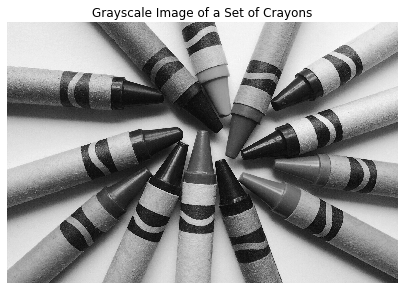

In [8]:
f, ax = plt.subplots(1, 1, figsize = (7, 7))
ax.imshow(image_gr, cmap = 'gray')
ax.set_title('Grayscale Image of a Set of Crayons')
ax.axis('off')
plt.show()

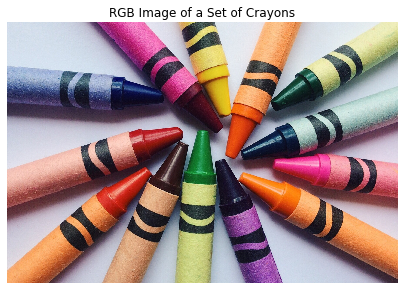

In [9]:
f, ax = plt.subplots(1, 1, figsize = (7, 7))
ax.imshow(image, cmap = 'gray')
ax.set_title('RGB Image of a Set of Crayons')
ax.axis('off')
plt.show()

All the crayons in the grayscale image look nearly the same. We can only figure out the difference between them once we have **enough spectral resolution** to differential between Red, Gree and Blue wavelengths.

### Temporal Resolution

Temporal resolution is the ability to distinguish between two images taken at different time intervals. This comes into picture when we play a sequence of images (as in a movie). Temporal resolution is important in the sense that it gives us the perception of seemless motion. The image below gives an illustration of the same.

<figure>
    <img src="https://thumbs.gfycat.com/BleakChiefKittiwake-size_restricted.gif" width = 500px/>
    <figcaption style = "text-align:center">Frame Rate Comparison. Ref: 
        <a href="https://gfycat.com/gifs/search/120fps">Gfycat</a>
    </figcaption>
</figure>

## Image Brightness/Contrast

Another set of properties a digital image has, is its brighness and contrast. These properties are concerned with the pixels of the image and the intensity level of the pixels. 

### Brightness

Image brightness is the average pixel intensity level of an image. A low level of pixel intensity creates a dark image and a very high level can create a blown up image. A balanced brightness results in a well illuminated image.

Let's look at how the image changes when we increase the intensity levels by some factor.

In [10]:
# Enhance function

def enhance(mat, a):
    res = np.ones(mat.shape)
    for i in range(0, mat.shape[0]):
        for j in range(0, mat.shape[1]):
            res[i, j] = a*mat[i, j]
    
    return res

def brightness_enhance(img, a = 2):
    res = np.ones(img.shape)
    if(len(res.shape) == 2):
        res = enhance(img, a)
        res = np.clip(res[:, :], 0, 255)
    else:
        for c in range(3):
            res[:, :, c] = enhance(img[:, :, c], a)
            res[:, :, c] = res[:, :, c]/np.max(res[:, :, c])
            
    return res

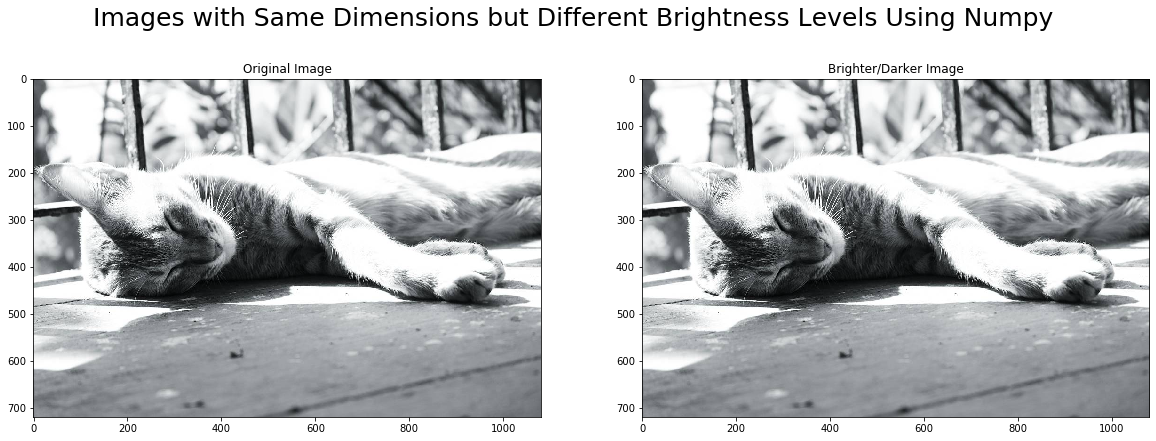

interactive(children=(FloatSlider(value=1.0, description='a', max=10.0, min=0.02, step=0.33), Output()), _dom_…

In [11]:
from ipywidgets import interact, widgets

image = cv2.imread('..//assets//images//bombay-3.jpg')

f, ax = plt.subplots(1, 2, figsize = (20, 7))

for x, t in zip(ax, ['Original Image', 'Brighter/Darker Image']):
    x.imshow(image, cmap = 'gray')
    x.set_title(t)

f.suptitle('Images with Same Dimensions but Different Brightness Levels Using Numpy', fontsize=25)
plt.show()

def helper(a = 2):
    res = brightness_enhance(image, a)
    
    ax[1].imshow(res, cmap = 'gray')
    f.canvas.draw()
    display(f)
    
interact(helper, a=widgets.FloatSlider(min = 0.02, max = 10, step=0.33, value=1));

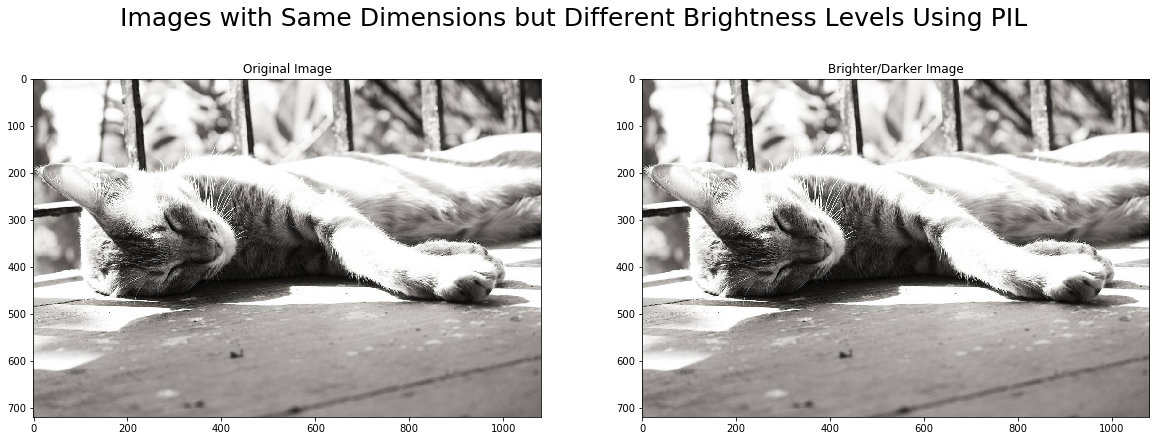

interactive(children=(FloatSlider(value=1.0, description='a', max=10.0, min=0.02, step=0.33), Output()), _dom_…

In [12]:
from PIL import Image, ImageEnhance

image = Image.open('..//assets//images//bombay-3.jpg')

f, ax = plt.subplots(1, 2, figsize = (20, 7))

for x, t in zip(ax, ['Original Image', 'Brighter/Darker Image']):
    x.imshow(image, cmap = 'gray')
    x.set_title(t)

f.suptitle('Images with Same Dimensions but Different Brightness Levels Using PIL', fontsize=25)
plt.show()

def helper(a = 0.2):
    enhancer = ImageEnhance.Brightness(image)
    enhanced_im = enhancer.enhance(a)
    
    ax[1].imshow(enhanced_im, cmap = 'gray')
    f.canvas.draw()
    display(f)
    
interact(helper, a=widgets.FloatSlider(min = 0.02, max = 10, step=0.33, value=1));

### Contrast

Image Contrast can be defined as the intensity difference between neighboring object such that neighboring objects are distinctly visible.

<br/>

<figure>
    <img src="https://www.thebetterindia.com/wp-content/uploads/2017/11/delhismog.jpg" width = 600px/>
    <figcaption style = "text-align:center">The Infamous Delhi Smog. Ref: 
        <a href="https://www.thebetterindia.com/122036/desperate-measures-government-delhi-smog/">The Better India</a>
    </figcaption>
</figure>

A poor contrast image such as the one above does not have clearly distinct objects although the objects are very much present in the image. The cars in the above image become increasingly faded as the contrast of the image is poorer in the top part of the image.

#### Perceptual Contrast 

The contrast or the relative brightness of pixels in an image are effected by the intensity levels of the neighboring pixels. This is what we refer to as perceptual contrast. Let's see this in action using three Numpy matrices.

In [13]:
import numpy as np

box1 = np.full((10,10), 255)
box1[2:8, 2:8] = 150

box2 = np.full((10,10), 123)
box2[2:8, 2:8] = 150

box3 = np.full((10,10), 61)
box3[2:8, 2:8] = 150

In [14]:
print('Box 1')
print(box1)
print('')
print('Box 2')
print(box2)
print('')
print('Box 3')
print(box3)

Box 1
[[255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 150 150 150 150 150 150 255 255]
 [255 255 150 150 150 150 150 150 255 255]
 [255 255 150 150 150 150 150 150 255 255]
 [255 255 150 150 150 150 150 150 255 255]
 [255 255 150 150 150 150 150 150 255 255]
 [255 255 150 150 150 150 150 150 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]]

Box 2
[[123 123 123 123 123 123 123 123 123 123]
 [123 123 123 123 123 123 123 123 123 123]
 [123 123 150 150 150 150 150 150 123 123]
 [123 123 150 150 150 150 150 150 123 123]
 [123 123 150 150 150 150 150 150 123 123]
 [123 123 150 150 150 150 150 150 123 123]
 [123 123 150 150 150 150 150 150 123 123]
 [123 123 150 150 150 150 150 150 123 123]
 [123 123 123 123 123 123 123 123 123 123]
 [123 123 123 123 123 123 123 123 123 123]]

Box 3
[[ 61  61  61  61  61  61  61  61  61  61]
 [ 61  61  61  61  61  61  61  61  61  61]
 [ 61  61 150 150 150 150 150 15

The above matrices are three 2D matrices containing a central zone of intensity level 150 and surrounding area with 255, 123, 61 pixel levels. Let's see how do these matrices look like when visualized as an image.

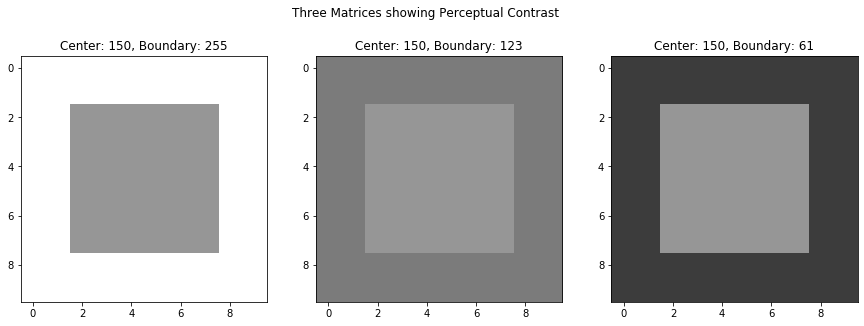

In [17]:
f, ax = plt.subplots(1, 3, figsize = (15, 5))
ax[0].imshow(box1, cmap='gray', vmin=0, vmax=255)
ax[1].imshow(box2, cmap='gray', vmin=0, vmax=255)
ax[2].imshow(box3, cmap='gray', vmin=0, vmax=255)

for x, s in zip(ax, ['Center: 150, Boundary: 255', 'Center: 150, Boundary: 123', 'Center: 150, Boundary: 61']):
    x.set_title(s)
#     x.axis('off')
    
f.suptitle('Three Matrices showing Perceptual Contrast')
plt.show()

Let's also check how does the fog image look like when contrast enhanced.

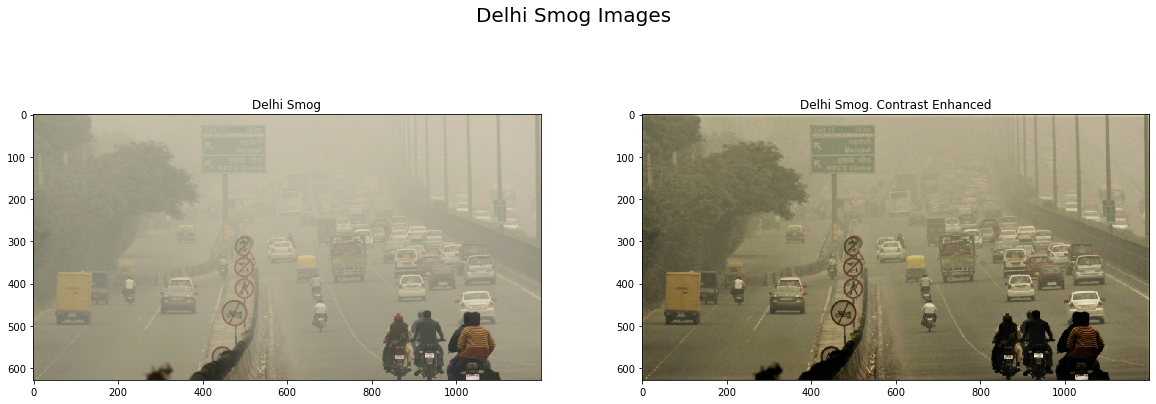

In [18]:
image = cv2.cvtColor(cv2.imread('..//assets//stock//delhismog.jpg'), cv2.COLOR_BGR2RGB)
image_con = cv2.cvtColor(cv2.imread('..//assets//stock//delhismog_con.jpg'), cv2.COLOR_BGR2RGB)

f, ax = plt.subplots(1, 2, figsize = (20, 7))

ax[0].imshow(image)
ax[1].imshow(image_con)

ax[0].set_title('Delhi Smog')
ax[1].set_title('Delhi Smog. Contrast Enhanced')

f.suptitle('Delhi Smog Images', fontsize = 20)
plt.show()

Let's look at something called as Image Histogram of these images to understand the difference between them.

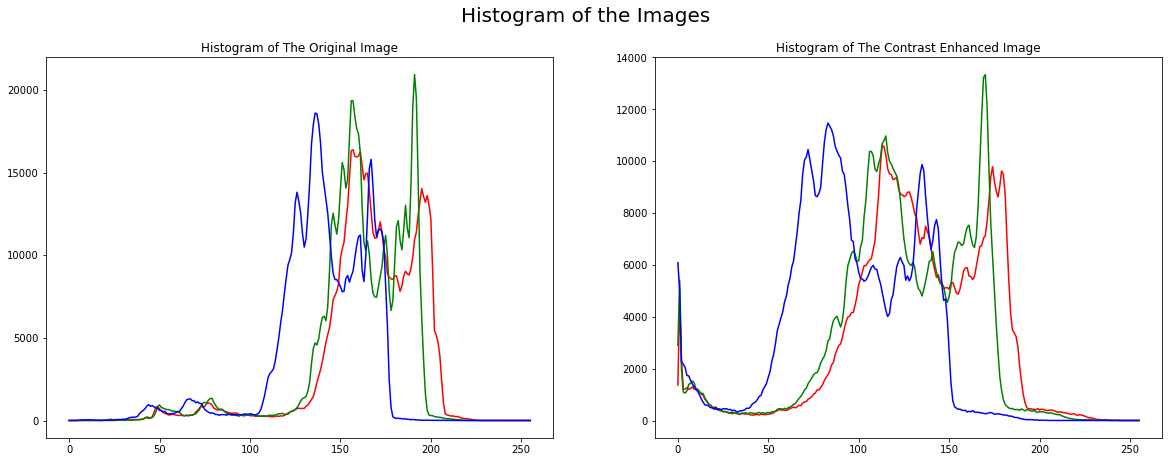

In [19]:
f, ax = plt.subplots(1, 2, figsize = (20, 7))

for ch, co in zip([0, 1, 2], ['red', 'green', 'blue']):
    ax[0].plot(cv2.calcHist([image[:, :, ch]],[0], None, [256], [0, 256]), color = co)
    ax[1].plot(cv2.calcHist([image_con[:, :, ch]],[0], None, [256], [0, 256]), color = co)
    
ax[0].set_title('Histogram of The Original Image')
ax[1].set_title('Histogram of The Contrast Enhanced Image')

f.suptitle('Histogram of the Images', fontsize = 20)
plt.show()

But what do these curves called as Histograms represent. Let's look at them in detail.

### Image Histogram

A histogram represents the variation of different ranges of values present in a set of data. It is a graphical display of number of occurrences of data points in different ranges. This display can be in the form of bars or curves.

Example of histogram for a data = [0, 1, 2, 3, 7, 8, 10, 20, 5, 11, 13] will be [(4, 5), (3, 10), (3, 15), (1, 20)]

For an image, a histogram represents the occurrence of pixels in different intensity ranges. For an 8-bit image the ranges will be between 0 and 255. The sum of heights of the histogram bars will be equal to the number of pixels in the image. 

Each channel (R, G, B) can have its own histogram.

In [20]:
# Function to print the image and it's histogram

def imageHist(im, title = 'Image and It\'s Histogram'):
    
    f, ax = plt.subplots(1, 2, figsize = (20, 7))

    ax[0].imshow(im)
    for ch, co in zip([0, 1, 2], ['red', 'green', 'blue']):
        ax[1].plot(cv2.calcHist([im[:, :, ch]],[0], None, [256], [0, 256]), color = co)

    ax[0].set_title('Image')
    ax[1].set_title('Histogram of the Image')

    f.suptitle(title, fontsize = 20)
    plt.show()

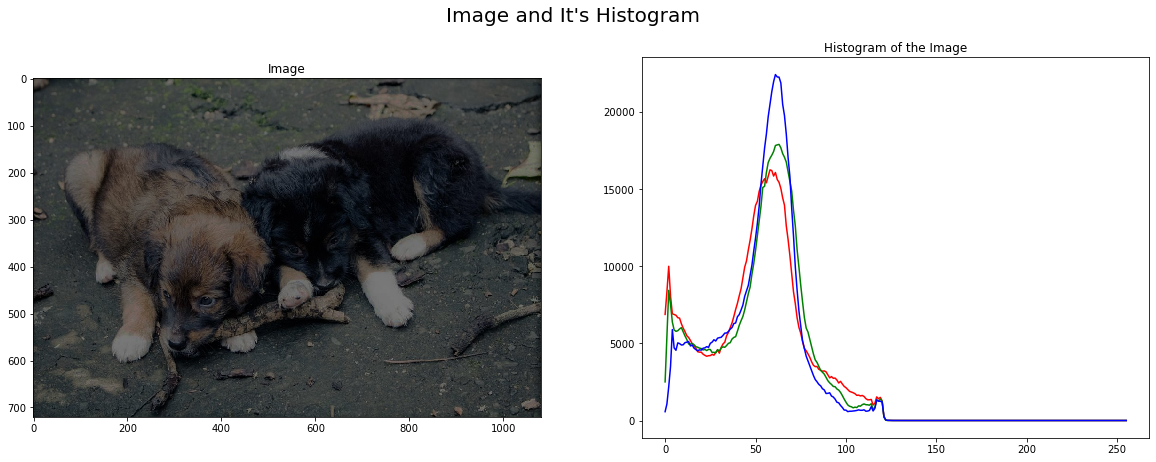

In [21]:
image = cv2.cvtColor(cv2.imread('..//assets//images//bombay-4_.jpg'), cv2.COLOR_BGR2RGB)

imageHist(image)

Above image does not utitlize the full range of available intensity levels from 0 to 255. Let's **stretch** this histogram to see how the image looks like when it utilizes the full range of available intensity values.

#### Histogram Stretch

Histrogram stretch is the process of mapping the intensity levels of an image using a function such that the range of intensity levels in the image improves.

The result of this stretch operation depends on the function used for mapping the intensities.

##### Linear Stretch

Linear Stretch maps the intensity levels between 0 and 255 linearly. This is achieved using the following equation:

<br/>

<div align="center"> $P^{'}_i = {(P_i - P_{min})}*\frac{Max_O - Min_O}{(P_{max} - P_{min}) + Min_O}$ </div>

Here $P_{max} = 255$  and $P_{min} = 0$. Thus

<div align="center"> $P^{'}_i = {(P_i - P_{min})}*\frac{255}{(P_{max} - P_{min})}$ </div>

Where $P_i$ = Input Pixel Intensity, $P^{'}_i$ = Output Pixel Intensity, $P_{max}$ = Max of Pixel intensities, $P_{min}$ = Min of Pixel intensities

Min and Max value before and after stretching (0, 126), (0, 255)


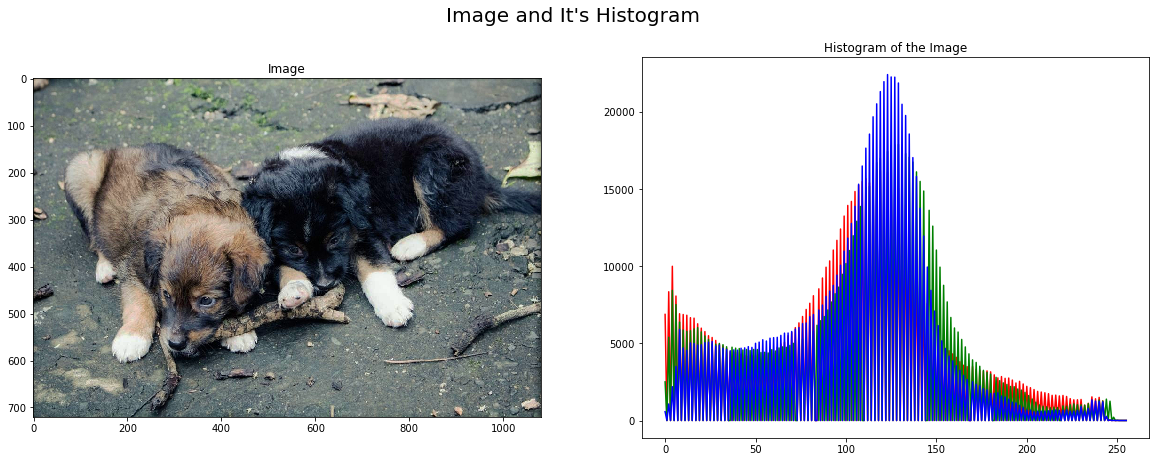

In [22]:
# Linear Stretch function

def lin_stretch(image):
    temp = image.copy()
    if(len(temp.shape) == 3):
        for i in range(image.shape[2]):
            minI = np.min(image[:, :, i])
            maxI = np.max(image[:, :, i])
            minO = 0
            maxO = 255
            temp[:, :, i] = (image[:, :, i] - minI)*(((maxO - minO)/(maxI - minI)) + minO)
    else:
        minI = np.min(image)
        maxI = np.max(image)
        minO = 0
        maxO = 255

        temp = (image - minI)*(((maxO - minO)/(maxI - minI)) + minO)
        
    return temp

image_lin = lin_stretch(image)

print('Min and Max value before and after stretching ({}, {}), ({}, {})'.format(np.min(image), np.max(image), 
                                                                                np.min(image_lin), np.max(image_lin)))

imageHist(image_lin)

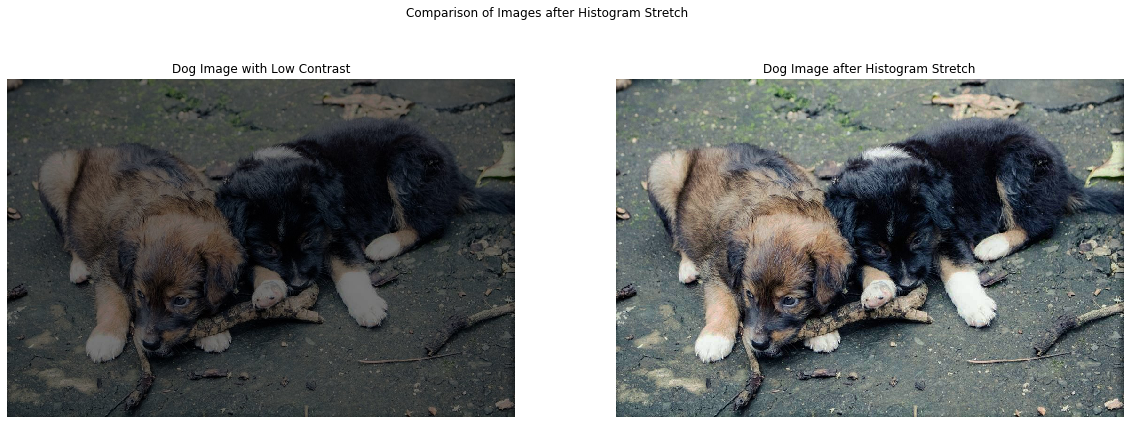

In [23]:
f, ax = plt.subplots(1, 2, figsize = (20, 7))

ax[0].imshow(image)
ax[1].imshow(image_lin)

ax[0].set_title('Dog Image with Low Contrast')
ax[1].set_title('Dog Image after Histogram Stretch')
ax[0].axis('off')
ax[1].axis('off')

f.suptitle('Comparison of Images after Histogram Stretch')
plt.show()

##### Logarithmic Stretch

Log Stretch maps the intensity levels between 0 and 255 but using a log function. This is achieved using the following equation:

<br/>

<div align="center"> $P^{'}_i = {k*log(1 + P_i) + c}$ </div>

Where $P_i$ = Input Pixel Intensity, $P^{'}_i$ = Output Pixel Intensity, $k$ = Multiplying constant, $c$ = Additive constant

The property of log curve which gives a different effect to this image from this stretch are:

- Log curve rises rapidly initially, levels off later
- Greater difference in values for smaller values, smaller difference for larger values. That is derivative is lower for higher values

This translates to:

- The higher intensity levels are maintained whereas the lower levels are given a boost
- Thus the image gets enhanced in the dark areas but does not blow off in the brighter areas.

**Reference**: [Prof. B. K. Mohan](http://www.csre.iitb.ac.in/bkmohan/)'s Course on [Satellite Image Processing](http://www.csre.iitb.ac.in/gnr607.php)

Let's see this in action

Min and Max value before and after stretching (0, 126), (25, 255)


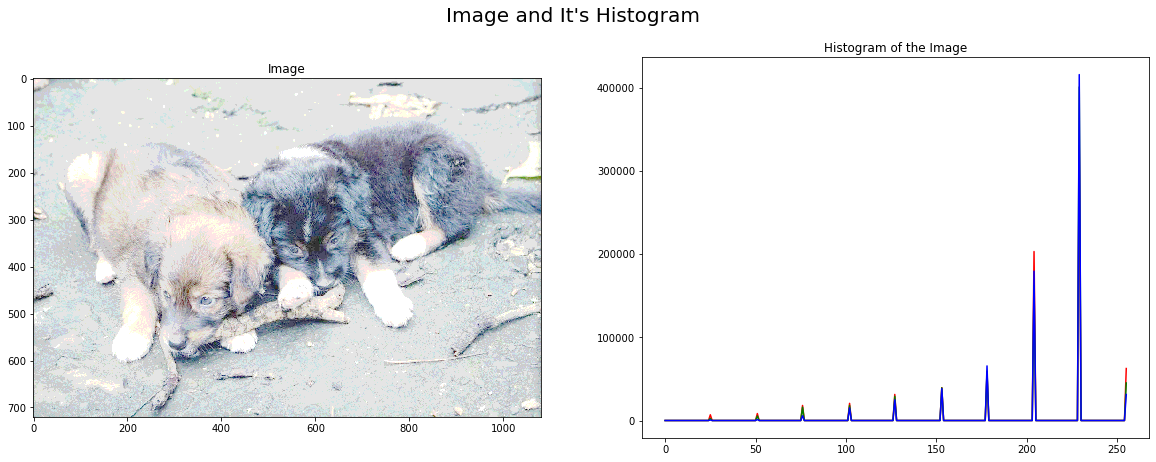

In [24]:
# Logarithmic Stretch function

def log_stretch(image, k, c):
    temp = image.copy()
    if(len(temp.shape) == 3):
        for i in range(3):
            temp[:, :, i] = k*np.log(1 + image[:, :, i]) + c
            temp[:, :, i] = 255.0*temp[:, :, i]/np.max(temp[:, :, i])
    else:
        temp = k*np.log(1 + image) + c
        temp = 255.0*temp/np.max(temp)
    return temp

image_log = log_stretch(image, 2, 1)

print('Min and Max value before and after stretching ({}, {}), ({}, {})'.format(np.min(image), np.max(image), 
                                                                                np.min(image_log), np.max(image_log)))

imageHist(image_log)

In [107]:
##TODO: Create Exponential Stretch Function and Observe it's properties